#**Lab 2: Multilayer Perceptron**

#**Neural Network Functions**

In [177]:
from google.colab import drive
from scipy import io
import math
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [178]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
def show_prob(p):

	p=p.data.squeeze().numpy()

	ft=15
	label = ('good - 0', 'weaving - 1', 'short-forming - 2')
	#p=p.data.squeeze().numpy()
	y_pos = np.arange(len(p))*1.2
	target=2
	width=0.9
	col= 'blue'
	#col='darkgreen'

	plt.rcdefaults()
	fig, ax = plt.subplots()

	# the plot
	ax.barh(y_pos, p, width , align='center', color=col)

	ax.set_xlim([0, 1.3])
	#ax.set_ylim([-0.8, len(p)*1.2-1+0.8])

	# y label
	ax.set_yticks(y_pos)
	ax.set_yticklabels(label, fontsize=ft)
	ax.invert_yaxis()  
	#ax.set_xlabel('Performance')
	#ax.set_title('How fast do you want to go today?')

	# x label
	ax.set_xticklabels([])
	ax.set_xticks([])
	#x_pos=np.array([0, 0.25 , 0.5 , 0.75 , 1])
	#ax.set_xticks(x_pos)
	#ax.set_xticklabels( [0, 0.25 , 0.5 , 0.75 , 1] , fontsize=15)

	ax.spines['right'].set_visible(False)
	ax.spines['top'].set_visible(False)
	ax.spines['bottom'].set_visible(False)
	ax.spines['left'].set_linewidth(4)


	for i in range(len(p)):
	    str_nb="{0:.2f}".format(p[i])
	    ax.text( p[i] + 0.05 , y_pos[i] ,str_nb ,
	             horizontalalignment='left', verticalalignment='center',
	             transform=ax.transData, color= col,fontsize=ft)



	plt.show()
	#fig.savefig('pic/prob', dpi=96, bbox_inches="tight")

In [180]:
def display_num_param(net):
	nb_param = 0
	for param in net.parameters():
	    nb_param += param.numel()
	print('There are {} ({:.2f} million) parameters in this neural network'.format(
		nb_param, nb_param/1e6)
	     )

In [181]:
def get_error( scores , labels ):

    bs=scores.size(0)
    predicted_labels = scores.argmax(dim=1)
    indicator = (predicted_labels == labels)
    num_matches=indicator.sum()
    
    return 1-num_matches.float()/bs 

In [182]:
def load_file(file_path):
  S = io.loadmat(file_path)
  return S

In [183]:
def train_test_split(S):
  data = S['data']
  np.random.seed(8)
  np.random.shuffle(data)
  partition_train = int(round(len(data)*0.7, -3))
  partition_test = int(round(len(data)*0.3, -2))
  trainset = data[:partition_train]
  testset = data[-partition_test:]
  return trainset, testset

In [184]:
def load_into_tensor(trainset, test_set):
  train_data=torch.Tensor(len(trainset),1,48)
  train_label=torch.LongTensor(len(trainset))
  for idx, data in enumerate(trainset):
    train_data[idx] = torch.from_numpy(data[:-1])
    train_label[idx] = data[-1]

  test_data=torch.Tensor(len(testset),1,48)
  test_label=torch.LongTensor(len(testset))
  for idx, data in enumerate(testset):
    test_data[idx] = torch.from_numpy(data[:-1])
    test_label[idx] = data[-1]

  return train_data, train_label, test_data, test_label

In [185]:
def print_data_size(train_data, train_label, test_data, test_label):
  print("Tensor data size:")
  print(train_data.size())
  print(train_label.size())
  print(test_data.size())
  print(test_label.size(),"\n")

Make a three layer net class

In [186]:
class mynet(nn.Module):

  def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
    super(mynet, self).__init__()

    self.layer1=nn.Linear(input_size,hidden_size1,bias=False)
    self.layer2=nn.Linear(hidden_size1,hidden_size2,bias=False)
    self.layer3=nn.Linear(hidden_size2,output_size,bias=False)

  def forward(self,x):

    y=self.layer1(x)
    y_hat=F.relu(y)
    z=self.layer2(y_hat)
    z_hat=F.relu(z)
    scores=self.layer3(z_hat)
    #prob = F.softmax(scores, dim =1)
    #return prob
    return scores

Make net class of different layers for task 2,3&4

In [187]:
class mynet2(nn.Module):

  def __init__(self,input_size,hidden_size,output_size):
    super(mynet2, self).__init__()

    self.layer1=nn.Linear(input_size,hidden_size,bias=False)
    self.layer2=nn.Linear(hidden_size,output_size,bias=False)

  def forward(self,x):

    x=self.layer1(x)
    x=F.relu(x)
    scores=self.layer2(x)
    #p=F.softmax(x,dim=0)
    return scores

class mynet5(nn.Module):

  def __init__(self,input_size,hidden_size1,hidden_size2,hidden_size3,hidden_size4,output_size):
    super(mynet5, self).__init__()

    self.layer1=nn.Linear(input_size,hidden_size1,bias=False)
    self.layer2=nn.Linear(hidden_size1,hidden_size2,bias=False)
    self.layer3=nn.Linear(hidden_size2,hidden_size3,bias=False)
    self.layer4=nn.Linear(hidden_size3,hidden_size4,bias=False)
    self.layer5=nn.Linear(hidden_size4,output_size,bias=False)

  def forward(self,x):

    x1=self.layer1(x)
    x1_hat=F.relu(x1)

    x2=self.layer2(x1_hat)
    x2_hat=F.relu(x2)

    x3=self.layer3(x2_hat)
    x3_hat=F.relu(x3)

    x4=self.layer4(x3_hat)
    x4_hat=F.relu(x4)

    scores=self.layer5(x4_hat)
    #p=F.softmax(x,dim=0)
    return scores

class mynet10(nn.Module):

  def __init__(self,input_size,hidden_size1,hidden_size2,hidden_size3,hidden_size4\
               ,hidden_size5,hidden_size6,hidden_size7,hidden_size8,hidden_size9,output_size):
    super(mynet10, self).__init__()

    self.layer1=nn.Linear(input_size,hidden_size1,bias=False)
    self.layer2=nn.Linear(hidden_size1,hidden_size2,bias=False)
    self.layer3=nn.Linear(hidden_size2,hidden_size3,bias=False)
    self.layer4=nn.Linear(hidden_size3,hidden_size4,bias=False)
    self.layer5=nn.Linear(hidden_size4,hidden_size5,bias=False)    
    self.layer6=nn.Linear(hidden_size5,hidden_size6,bias=False)
    self.layer7=nn.Linear(hidden_size6,hidden_size7,bias=False)
    self.layer8=nn.Linear(hidden_size7,hidden_size8,bias=False)
    self.layer9=nn.Linear(hidden_size8,hidden_size9,bias=False)
    self.layer10=nn.Linear(hidden_size9,output_size,bias=False)


  def forward(self,x):

    x1=self.layer1(x)
    x1_hat=F.relu(x1)
    
    x2=self.layer2(x1_hat)
    x2_hat=F.relu(x2)
    
    x3=self.layer3(x2_hat)
    x3_hat=F.relu(x3)
    
    x4=self.layer4(x3_hat)
    x4_hat=F.relu(x4)
    
    x5=self.layer5(x4_hat)
    x5_hat=F.relu(x5)
    
    x6=self.layer6(x5_hat)
    x6_hat=F.relu(x6)
    
    x7=self.layer7(x6_hat)
    x7_hat=F.relu(x7)
    
    x8=self.layer8(x7_hat)
    x8_hat=F.relu(x8)
    
    x9=self.layer9(x8_hat)
    x9_hat=F.relu(x9)
    
    scores=self.layer10(x9_hat)
    #p=F.softmax(x,dim=0)
    return scores

In [188]:
def eval_on_test_set(bs_ , test_data, test_label):

    running_error=0
    num_batches=0

    for i in range(0,len(test_data),bs_):

        minibatch_data =  test_data[i:i+bs_]
        minibatch_label= test_label[i:i+bs_]

        inputs = minibatch_data.view(bs_,48)

        scores=net( inputs ) 

        error = get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [189]:
def train_network (train_data, train_label, test_data, test_label, lr_ = 0.05, epoch_ = 50, bs_ = 10):

  start = time.time()

  lr = lr_ # initial learning rate

  for epoch in range(epoch_):
      
      # learning rate strategy : divide the learning rate by 1.5 every 10 epochs
      if epoch%10==0 and epoch>10: 
          lr = lr / 1.5
      
      # create a new optimizer at the beginning of each epoch: give the current learning rate.   
      optimizer=torch.optim.SGD( net.parameters() , lr=lr )
          
      running_loss=0
      running_error=0
      num_batches=0
      
      shuffled_indices=torch.randperm(len(train_data))
  
      for count in range(0,len(train_data),bs_):
          
          # forward and backward pass
      
          optimizer.zero_grad()
          
          indices=shuffled_indices[count:count+bs_]
          minibatch_data =  train_data[indices]
          minibatch_label= train_label[indices]

          inputs = minibatch_data.view(bs_,48)

          inputs.requires_grad_()

          scores=net( inputs ) 

          loss =  criterion( scores , minibatch_label) 
          
          loss.backward()

          optimizer.step()
          
          
          # compute some stats
          
          running_loss += loss.detach().item()
                
          error = get_error( scores.detach() , minibatch_label)
          running_error += error.item()
          
          num_batches+=1
      
      
      # once the epoch is finished we divide the "running quantities"
      # by the number of batches
      
      total_loss = running_loss/num_batches
      total_error = running_error/num_batches
      elapsed_time = time.time() - start
      
      # every 10 epoch we display the stats 
      # and compute the error rate on the test set  
      
      if epoch % 10 == 0 : 
      
          print(' ')
          
          print('epoch=',epoch, ' time=', elapsed_time,
                ' loss=', total_loss , ' error=', total_error*100 ,'percent lr=', lr)
          
          eval_on_test_set(bs_, test_data, test_label)

# **Task 1**

Tensor data size:
torch.Size([2000, 1, 48])
torch.Size([2000])
torch.Size([900, 1, 48])
torch.Size([900]) 

Building the net:
mynet(
  (layer1): Linear(in_features=48, out_features=10, bias=False)
  (layer2): Linear(in_features=10, out_features=10, bias=False)
  (layer3): Linear(in_features=10, out_features=3, bias=False)
)
There are 610 (0.00 million) parameters in this neural network

 None

Real value:  tensor(2)


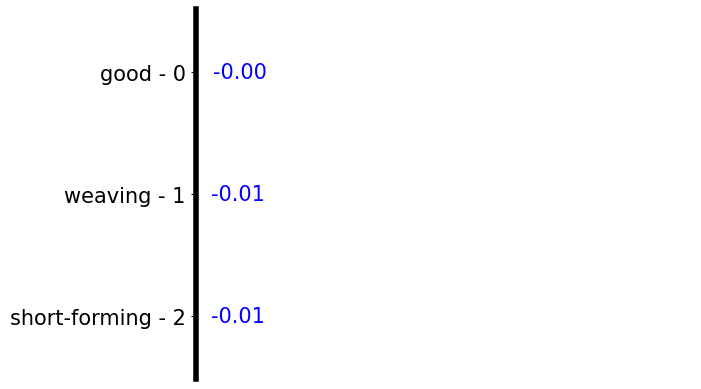


Training the network:

 
epoch= 0  time= 0.12800168991088867  loss= 1.0920673203468323  error= 51.75000020861626 percent lr= 0.05
test error  =  38.999999695354035 percent
 
epoch= 10  time= 1.1650619506835938  loss= 0.1324393234634772  error= 5.050000548362732 percent lr= 0.05
test error  =  1.8888892730077107 percent
 
epoch= 20  time= 2.1770613193511963  loss= 0.013436883895192295  error= 0.050000011920928955 percent lr= 0.03333333333333333
test error  =  0.11111113760206434 percent
 
epoch= 30  time= 3.200132369995117  loss= 0.0057667471082822885  error= 0.050000011920928955 percent lr= 0.022222222222222223
test error  =  0.0 percent
 
epoch= 40  time= 4.2072913646698  loss= 0.0032846526794673993  error= 0.0 percent lr= 0.014814814814814815
test error  =  0.0 percent

Real value:  tensor(2)


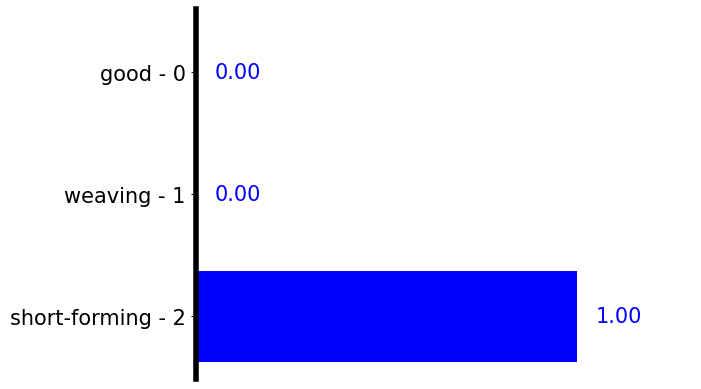

In [190]:
#load the data
file_path = '/content/drive/MyDrive/Y2S2 Projects/CZ3005/Lab 2/secondhalf_LAB/secondhalf_LAB/submission/OQC.mat'
S = load_file(file_path)

#partition dataset randomly into train and test set
trainset, testset = train_test_split(S)

#load into tensor
train_data, train_label, test_data, test_label = load_into_tensor(trainset, testset)

#print tensor data size
print_data_size(train_data, train_label, test_data, test_label)

#build the net
print("Building the net:")
#network structure: hidden nodes and hidden layers
input_size, hidden_layer1, hidden_layer2, output_size = 48, 10, 10, 3
net = mynet(input_size, hidden_layer1, hidden_layer2, output_size)
print(net)
print("\n", display_num_param(net))

#feed a random sample test data into the untrained model
#taking the 8th sample of test set
sample = test_data[8]
real_value = test_label[8]
print("\nReal value: ", real_value)
scores = net(sample.view(1,48))
show_prob(scores)

#training the network
criterion = nn.CrossEntropyLoss()
bs_ = 10
lr_ = 0.05
epoch_ = 50

print("\nTraining the network:\n")
train_network(train_data, train_label, test_data, test_label)

# choose a picture at random
idx=randint(0, len(test_data)-1)
test_sample=test_data[idx]

# feed it to the net and display the confidence scores
scores = net( test_sample.view(1,48)) 
prob=F.softmax(scores, dim = 1)

print("\nReal value: ", test_label[idx])

show_prob(prob)

#**Task 2**

Create 3 neural network of layer size 2, 5, 10

In [191]:
#load the data
file_path = '/content/drive/MyDrive/Y2S2 Projects/CZ3005/Lab 2/secondhalf_LAB/secondhalf_LAB/submission/OQC.mat'
S = load_file(file_path)

#partition dataset randomly into train and test set
trainset, testset = train_test_split(S)

#load into tensor
train_data, train_label, test_data, test_label = load_into_tensor(trainset, testset)

In [192]:
hidden_layer_nodes = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,150]
#network structure: hidden nodes and hidden layers
hidden_size1 = 10
hidden_size2 = 10
hidden_size3 = 10
hidden_size4 = 10
hidden_size5 = 10
hidden_size6 = 10
hidden_size7 = 10
hidden_size8 = 10
hidden_size9 = 10
input_size, output_size = 48, 3

time_2_layers = []
time_3_layers = []
time_5_layers = []
time_10_layers = []

for node in hidden_layer_nodes:
  hidden_size1 = node
  net = mynet2(input_size,hidden_size1, output_size)
  print(net)
  print("\n", display_num_param(net))

  criterion = nn.CrossEntropyLoss()
  print("\nTraining the network:\n")
  bs_ = 10
  lr_ = 0.05
  epoch_ = 50

  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label)
  time_2_layers.append(time.time() - start_time)

for node in hidden_layer_nodes:
  hidden_size1 = node
  hidden_size2 = node
  net = mynet(input_size,hidden_size1,hidden_size2, output_size)
  print(net)
  print("\n", display_num_param(net))

  criterion = nn.CrossEntropyLoss()
  print("\nTraining the network:\n")
  bs_ = 10
  lr_ = 0.05
  epoch_ = 50

  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label)
  time_3_layers.append(time.time() - start_time)

for node in hidden_layer_nodes:
  hidden_size1 = node
  hidden_size2 = node
  hidden_size3 = node
  hidden_size4 = node
  net = mynet5(input_size,hidden_size1,hidden_size2,hidden_size3,hidden_size4, output_size)
  print(net)
  print("\n", display_num_param(net))

  criterion = nn.CrossEntropyLoss()
  print("\nTraining the network:\n")
  bs_ = 10
  lr_ = 0.05
  epoch_ = 50

  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label)
  time_5_layers.append(time.time() - start_time)

for node in hidden_layer_nodes:
  hidden_size1 = node
  hidden_size2 = node
  hidden_size3 = node
  hidden_size4 = node
  hidden_size5 = node
  hidden_size6 = node
  hidden_size7 = node
  hidden_size8 = node
  hidden_size9 = node
  net = mynet10(input_size,hidden_size1,hidden_size2,hidden_size3,hidden_size4\
                ,hidden_size5,hidden_size6,hidden_size7,hidden_size8,hidden_size9, output_size)
  print(net)
  print("\n", display_num_param(net))

  criterion = nn.CrossEntropyLoss()
  print("\nTraining the network:\n")
  bs_ = 10
  lr_ = 0.05
  epoch_ = 50

  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label)
  time_10_layers.append(time.time() - start_time)

print(time_2_layers)
print(time_3_layers)
print(time_5_layers)
print(time_10_layers)

mynet2(
  (layer1): Linear(in_features=48, out_features=2, bias=False)
  (layer2): Linear(in_features=2, out_features=3, bias=False)
)
There are 102 (0.00 million) parameters in this neural network

 None

Training the network:

 
epoch= 0  time= 0.09264063835144043  loss= 1.0583618834614754  error= 57.59999999403953 percent lr= 0.05
test error  =  68.22222239441342 percent
 
epoch= 10  time= 1.0016846656799316  loss= 0.7909127007424831  error= 35.19999983906746 percent lr= 0.05
test error  =  38.555555409855316 percent
 
epoch= 20  time= 1.8997089862823486  loss= 0.7701554052531719  error= 35.19999986886978 percent lr= 0.03333333333333333
test error  =  38.555555409855316 percent
 
epoch= 30  time= 2.7879419326782227  loss= 0.7672704604268074  error= 35.199999779462814 percent lr= 0.022222222222222223
test error  =  38.555555409855316 percent
 
epoch= 40  time= 3.6782588958740234  loss= 0.7664093594253063  error= 35.19999983906746 percent lr= 0.014814814814814815
test error  =  38.555

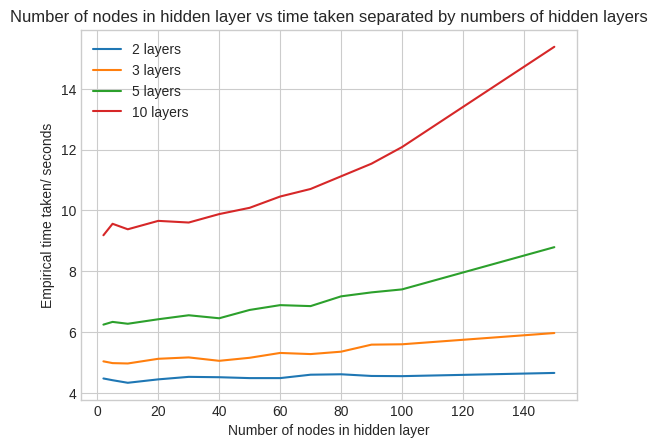

In [193]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

plt.title("Number of nodes in hidden layer vs time taken separated by numbers of hidden layers")
plt.xlabel("Number of nodes in hidden layer")
plt.ylabel("Empirical time taken/ seconds");

ax.plot(hidden_layer_nodes,time_2_layers, label = "2 layers")
ax.plot(hidden_layer_nodes,time_3_layers, label = "3 layers")
ax.plot(hidden_layer_nodes,time_5_layers, label = "5 layers")
ax.plot(hidden_layer_nodes,time_10_layers, label = "10 layers")

plt.legend()

#**Task 3**

In [194]:
#load the data
file_path = '/content/drive/MyDrive/Y2S2 Projects/CZ3005/Lab 2/secondhalf_LAB/secondhalf_LAB/submission/OQC.mat'
S = load_file(file_path)

#partition dataset randomly into train and test set
trainset, testset = train_test_split(S)

#load into tensor
train_data, train_label, test_data, test_label = load_into_tensor(trainset, testset)

In [195]:
lr = np.arange(0.0, 0.1, 0.01)

time_2_layers_lr = []
time_3_layers_lr = []
time_5_layers_lr = []
time_10_layers_lr = []

#3 layer net class
for learning_rate in lr:
  input_size, hidden_layer1, hidden_layer2, output_size = 48, 10, 10, 3
  net = mynet(input_size, hidden_layer1, hidden_layer2, output_size)
  print(net)
  print("\n", display_num_param(net))

  #training the network
  criterion = nn.CrossEntropyLoss()
  bs_ = 10
  epoch_ = 50

  print("\nTraining the network with learning rate {}:\n".format(learning_rate))
  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label, lr_ = learning_rate)
  time_3_layers_lr.append(time.time() - start_time)
'''
#2 layer net class
for learning_rate in lr:
  input_size, hidden_layer1, output_size = 48, 10, 3
  net = mynet2(input_size, hidden_layer1, output_size)
  print(net)
  print("\n", display_num_param(net))

  #training the network
  criterion = nn.CrossEntropyLoss()
  bs_ = 10
  epoch_ = 50

  print("\nTraining the network with learning rate {}:\n".format(learning_rate))
  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label, lr_ = learning_rate)
  time_2_layers_lr.append(time.time() - start_time)

#5 layer net class
for learning_rate in lr:
  input_size, hidden_layer1,hidden_layer2, hidden_layer3, hidden_layer4, output_size = 48,10,10,10,10,3
  net = mynet5(input_size, hidden_layer1, hidden_layer2, hidden_layer3, hidden_layer4, output_size)
  print(net)
  print("\n", display_num_param(net))

  #training the network
  criterion = nn.CrossEntropyLoss()
  bs_ = 10
  epoch_ = 50

  print("\nTraining the network with learning rate {}:\n".format(learning_rate))
  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label, lr_ = learning_rate)
  time_5_layers_lr.append(time.time() - start_time)

#10 layer net class
for learning_rate in lr:
  input_size, hidden_layer1,hidden_layer2, hidden_layer3, hidden_layer4\
  ,hidden_layer5, hidden_layer6, hidden_layer7, hidden_layer8,hidden_layer9, output_size = 48,10,10,10,10,10,10,10,10,10,3
  net = mynet10(input_size, hidden_layer1, hidden_layer2, hidden_layer3, hidden_layer4\
                ,hidden_layer5, hidden_layer6, hidden_layer7, hidden_layer8,hidden_layer9, output_size)
  print(net)
  print("\n", display_num_param(net))

  #training the network
  criterion = nn.CrossEntropyLoss()
  bs_ = 10
  epoch_ = 50

  print("\nTraining the network with learning rate {}:\n".format(learning_rate))
  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label, lr_ = learning_rate)
  time_10_layers_lr.append(time.time() - start_time)  
'''
#print(time_2_layers_lr)
print(time_3_layers_lr)
#print(time_5_layers_lr)
#print(time_10_layers_lr)

mynet(
  (layer1): Linear(in_features=48, out_features=10, bias=False)
  (layer2): Linear(in_features=10, out_features=10, bias=False)
  (layer3): Linear(in_features=10, out_features=3, bias=False)
)
There are 610 (0.00 million) parameters in this neural network

 None

Training the network with learning rate 0.0:

 
epoch= 0  time= 0.1131587028503418  loss= 1.1035372978448867  error= 70.34999993443489 percent lr= 0.0
test error  =  73.3333334657881 percent
 
epoch= 10  time= 1.1726970672607422  loss= 1.1035372984409333  error= 70.35000005364418 percent lr= 0.0
test error  =  73.3333334657881 percent
 
epoch= 20  time= 2.210191011428833  loss= 1.1035373002290725  error= 70.35000011324883 percent lr= 0.0
test error  =  73.3333334657881 percent
 
epoch= 30  time= 3.237413167953491  loss= 1.1035373055934905  error= 70.35000005364418 percent lr= 0.0
test error  =  73.3333334657881 percent
 
epoch= 40  time= 4.254938364028931  loss= 1.1035373032093048  error= 70.35000011324883 percent lr= 0

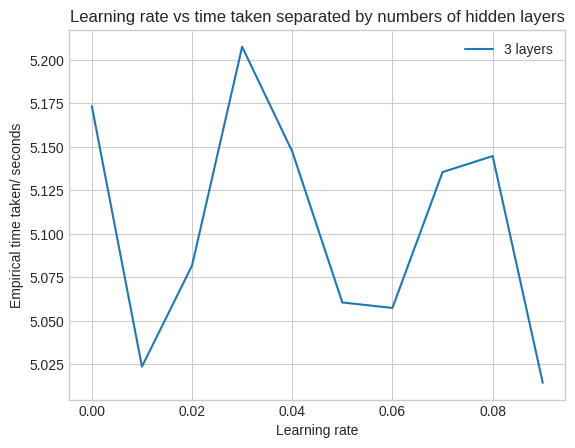

In [196]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

plt.title("Learning rate vs time taken separated by numbers of hidden layers")
plt.xlabel("Learning rate")
plt.ylabel("Empirical time taken/ seconds");

#ax.plot(lr,time_2_layers_lr, label = "2 layers")
ax.plot(lr,time_3_layers_lr, label = "3 layers")
#ax.plot(lr,time_5_layers_lr, label = "5 layers")
#ax.plot(lr,time_10_layers_lr, label = "10 layers")

plt.legend()

#**Task 4**

In [197]:
#load the data
file_path = '/content/drive/MyDrive/Y2S2 Projects/CZ3005/Lab 2/secondhalf_LAB/secondhalf_LAB/submission/OQC.mat'
S = load_file(file_path)

#partition dataset randomly into train and test set
trainset, testset = train_test_split(S)

#load into tensor
train_data, train_label, test_data, test_label = load_into_tensor(trainset, testset)

In [198]:
bs = [1,10,20,50]

time_3_layers_bs = []

#3 layer net class
for minibatch_size in bs:
  input_size, hidden_layer1, hidden_layer2, output_size = 48, 10, 10, 3
  net = mynet(input_size, hidden_layer1, hidden_layer2, output_size)
  print(net)
  print("\n", display_num_param(net))

  #training the network
  criterion = nn.CrossEntropyLoss()
  lr_ = 0.05
  epoch_ = 50

  print("\nTraining the network with mini batch size of {}:\n".format(minibatch_size))
  start_time = time.time()
  train_network(train_data, train_label, test_data, test_label, bs_ = minibatch_size)
  time_3_layers_bs.append(time.time() - start_time)

print(time_3_layers_bs)

mynet(
  (layer1): Linear(in_features=48, out_features=10, bias=False)
  (layer2): Linear(in_features=10, out_features=10, bias=False)
  (layer3): Linear(in_features=10, out_features=3, bias=False)
)
There are 610 (0.00 million) parameters in this neural network

 None

Training the network with mini batch size of 1:

 
epoch= 0  time= 0.9116394519805908  loss= 0.5732842681489346  error= 25.900000000000002 percent lr= 0.05
test error  =  24.0 percent
 
epoch= 10  time= 10.179166078567505  loss= 0.09180547333214216  error= 2.35 percent lr= 0.05
test error  =  1.6666666666666667 percent
 
epoch= 20  time= 19.2964985370636  loss= 7.179171678867391e-05  error= 0.0 percent lr= 0.03333333333333333
test error  =  0.0 percent
 
epoch= 30  time= 28.395635843276978  loss= 3.947331799193066e-05  error= 0.0 percent lr= 0.022222222222222223
test error  =  0.0 percent
 
epoch= 40  time= 37.749297857284546  loss= 3.0580245312393116e-05  error= 0.0 percent lr= 0.014814814814814815
test error  =  0.0 p

No handles with labels found to put in legend.


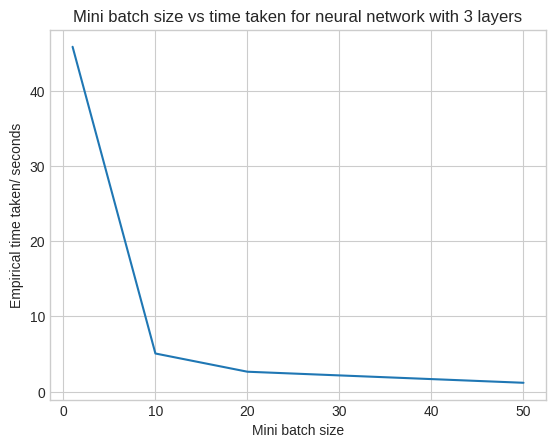

In [199]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

plt.title("Mini batch size vs time taken for neural network with 3 layers")
plt.xlabel("Mini batch size")
plt.ylabel("Empirical time taken/ seconds");

ax.plot(bs,time_3_layers_bs)

plt.legend()